In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def plot_opensignals(file_path, time_range=None):
    """
    Plot pulse oximetry data from an OpenSignals text file.
    
    Parameters:
    - file_path (str): Path to the OpenSignals text file.
    - time_range (tuple, optional): Tuple of (start_time, end_time) in seconds to plot a specific range.
                                    If None, plots the entire signal.
    """
    # Read the data, skipping the header lines (lines starting with '#')
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            if not line.startswith('#'):  # Skip header lines
                values = line.strip().split('\t')
                data.append(float(values[-1]))  # Extract the 'A1' column (last column)

    # Convert data to a NumPy array
    signal = np.array(data)

    # Create a time axis based on the sampling rate (1000 Hz)
    sampling_rate = 1000  # Hz
    time = np.arange(0, len(signal)) / sampling_rate  # Time in seconds

    # Apply time range if specified
    if time_range is not None:
        start_time, end_time = time_range
        # Convert time to sample indices
        start_idx = int(start_time * sampling_rate)
        end_idx = int(end_time * sampling_rate)
        # Ensure indices are within bounds
        start_idx = max(0, start_idx)
        end_idx = min(len(signal), end_idx)
        # Slice the signal and time arrays
        signal = signal[start_idx:end_idx]
        time = time[start_idx:end_idx]

    # Plot the data
    plt.figure(figsize=(12, 6))
    plt.plot(time, signal, label='Pulse Oximetry (A1)', color='blue')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Sensor Value (A1)')
    plt.title('Pulse Oximetry Signal from BITalino')
    plt.grid(True)
    plt.legend()
    plt.show()

In [45]:
# Example: Plot the entire signal
file_path = "collected_data/bend finger/opensignals_201907007E21_2025-03-09_12-12-28.txt"  # Replace with your file path

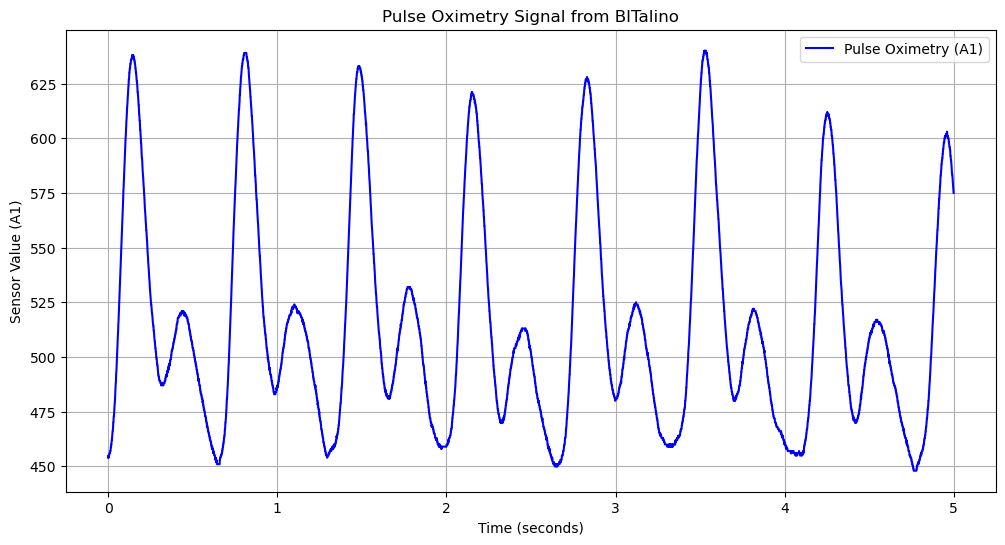

In [ ]:
#standard finger form clean
plot_opensignals(file_path, time_range=(0, 5))

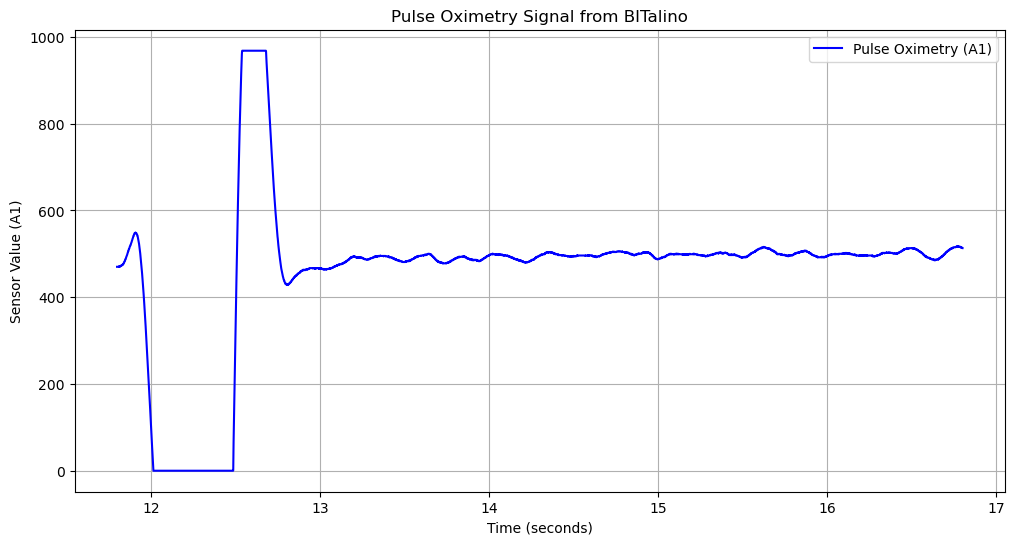

In [ ]:
#bend finger down form clean
plot_opensignals(file_path, time_range=(11.8, 16.8))

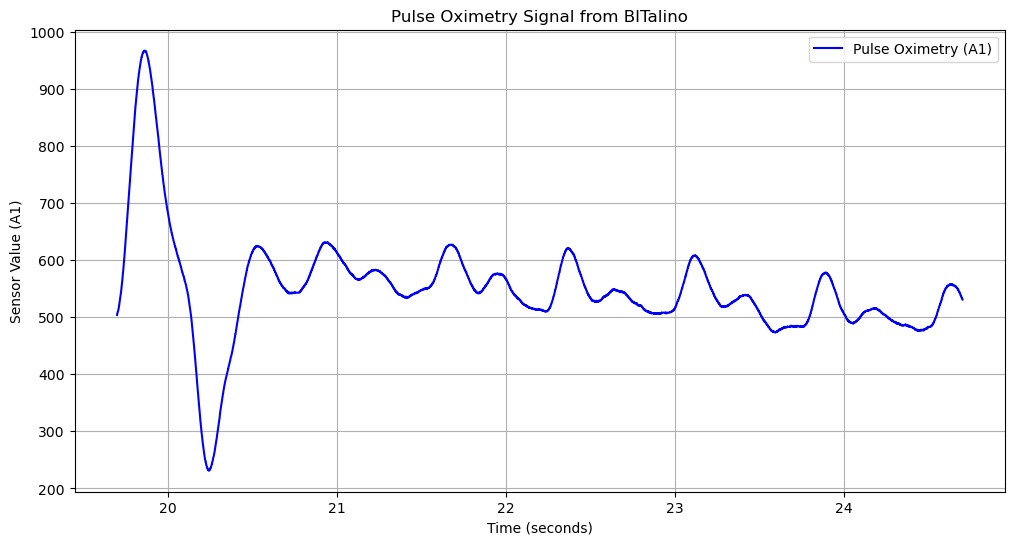

In [ ]:
#bend finger up clean
plot_opensignals(file_path, time_range=(19.7, 24.7))

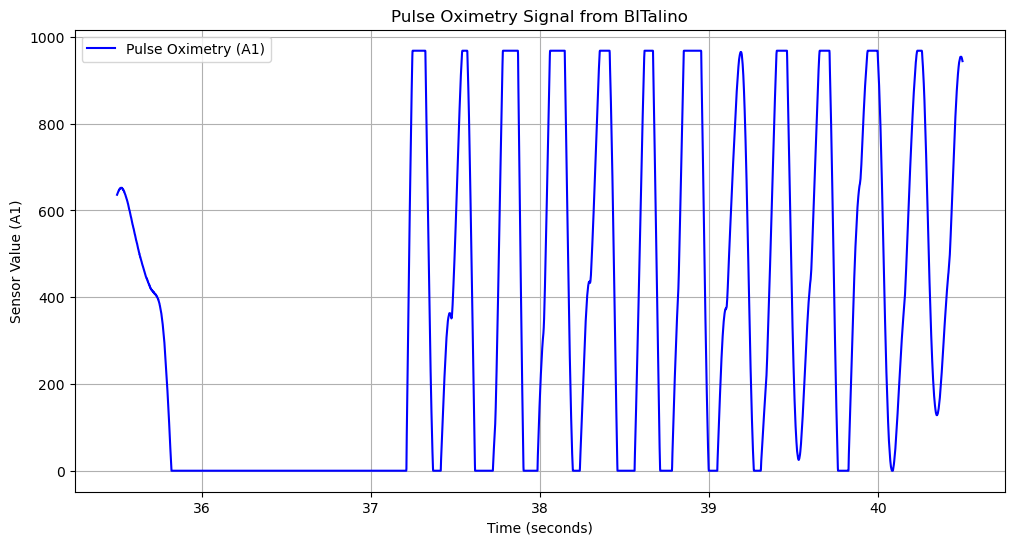

In [ ]:
#finger tap clean

plot_opensignals(file_path, time_range=(35.5, 40.5))

In [44]:
########
file_path_dirt = "collected_data/dirty finger/opensignals_201907007E21_2025-03-09_12-26-32.txt"


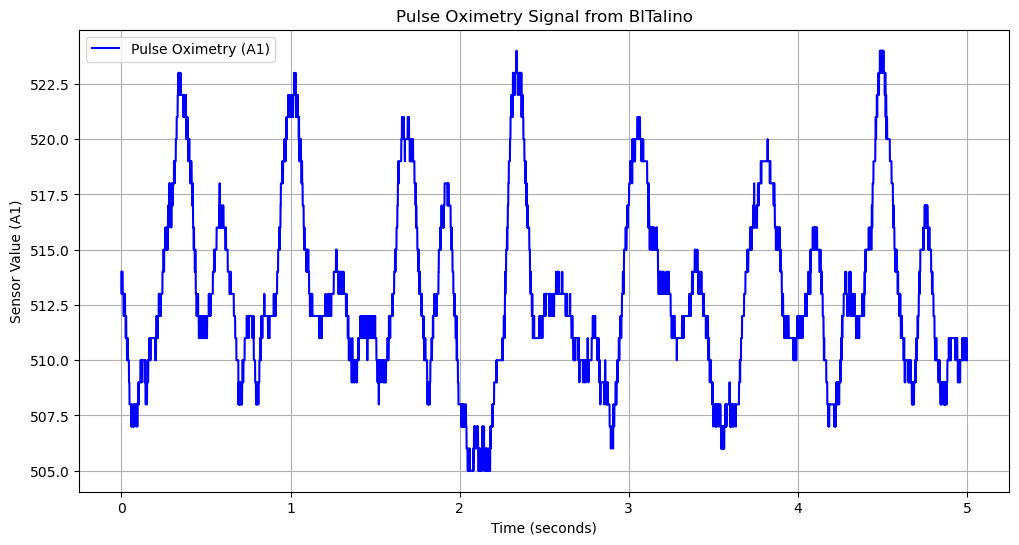

In [ ]:
#dirty still
plot_opensignals(file_path_dirt, time_range=(0, 5))

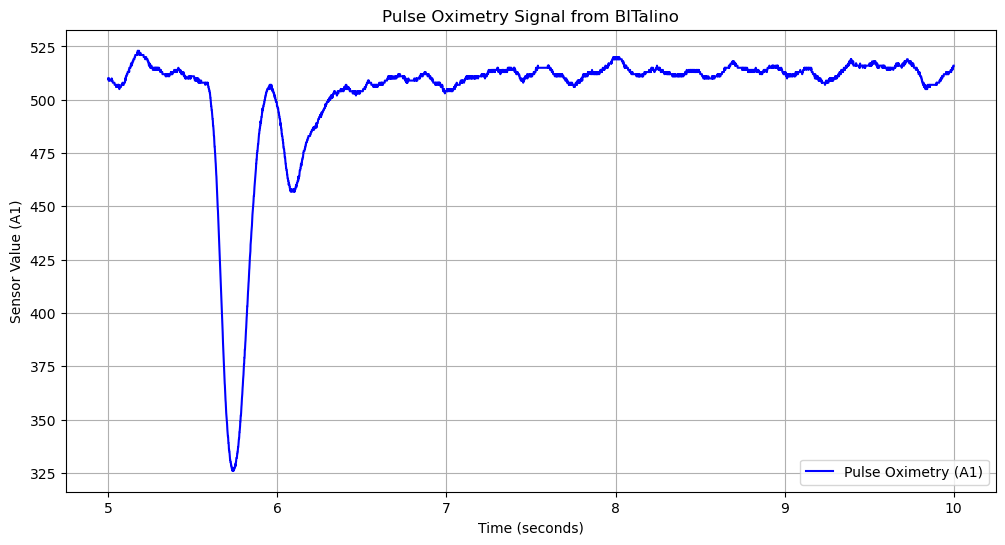

In [40]:
#dirty bend down
plot_opensignals(file_path_dirt, time_range=(5, 10))

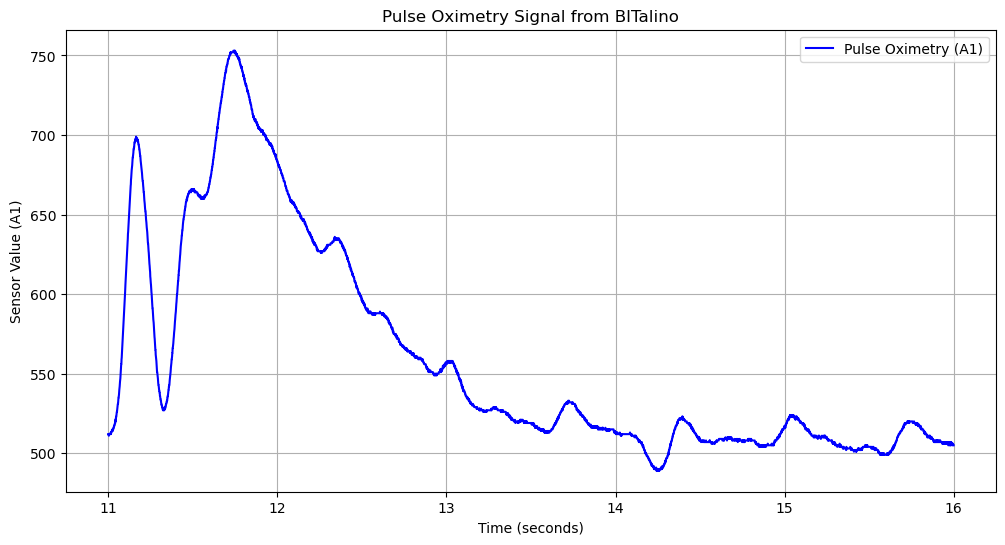

In [42]:
#dirty bend up
plot_opensignals(file_path_dirt, time_range=(11, 16))

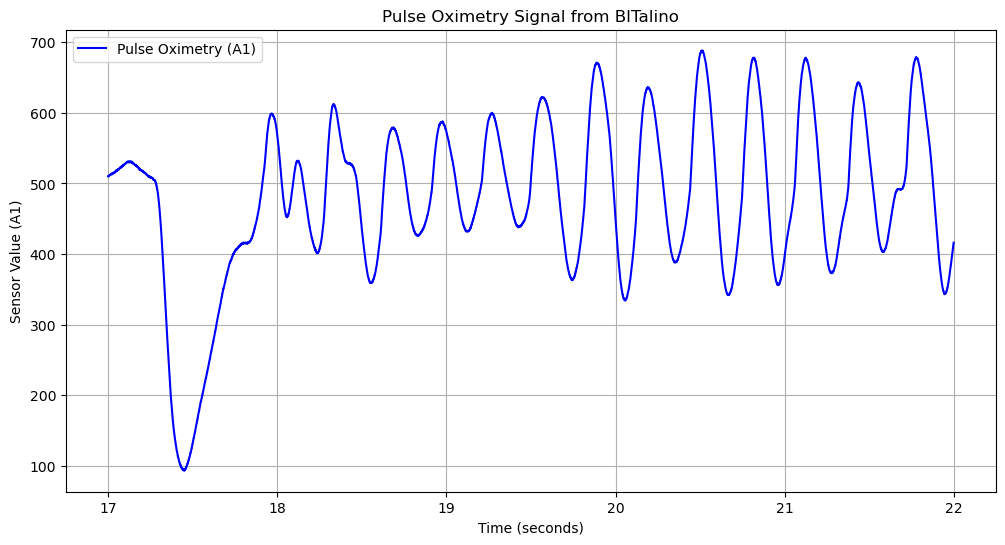

In [43]:
#dirty tap dirty
plot_opensignals(file_path_dirt, time_range=(17, 22))